<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/NLP_projs/spam_detection/ci_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description:

Anti-spam software and filters scan emails for red flags. These red flags are based on common attributes of spam messages. In the time an email is sent, to the time it lands in your inbox, filters will examine an email and decide whether it gets delivered to your inbox or into the spam folder.

Email spam detection, it is a binary classification problem. The reason to do this is simple: by detecting unsolicited and unwanted emails, which prevent spam messages from creeping into the user's inbox, thereby improving user experience. Emails are sent through a spam detector.



![](https://miro.medium.com/max/720/0*mbFBPcPUJD-53v3h.webp)

> # Datasets
In this project, I used two datasets:


1.   [The first dataset](https://archive.ics.uci.edu/ml/datasets/spambase): The open-source Spambase dataset from the UCI machine learning repository, a dataset that contains 5569 emails, of which 745 are spam. This is the preprocessed and raw dataset.

2.   [The second dataset](https://raw.githubusercontent.com/OmkarPathak/Playing-with-datasets): This one is contain emails without preprocessing. The csv file contains 5728  rows and two columns, each row for each email. The two columns are text and spam. 

> Please consider that the second dataset is unbalanced, which could result in predicting spam as ham.

> 0    4360 'ham'

> 1    1368 'spam'

> Name: spam, dtype: int64








> ## Package installation

In [ ]:
# The XGBoost installation
!pip install xgboost

In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53)  [GCC 9.4.0]
executable: /opt/conda/bin/python
   machine: Linux-5.15.65+-x86_64-with-debian-bullseye-sid

Python dependencies:
          pip: 22.1.2
   setuptools: 59.8.0
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.7.3
       Cython: 0.29.33
       pandas: 1.3.5
   matplotlib: 3.5.2
       joblib: 1.0.1
threadpoolctl: 3.1.0

Built with OpenMP: True


> # Load and preprocess the dataset

> #### Spambase dataset - preprocessed:

In [ ]:
# Get the dataset
# Target col = 1 ====> Spam 
# Target col = 0 ====> Ham 

! wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2023-01-27 16:34:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data’

spambase.data       100%[===================>] 686.47K  4.42MB/s    in 0.2s    

2023-01-27 16:34:16 (4.42 MB/s) - ‘spambase.data’ saved [702942/702942]



In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import numpy as np
from numpy.random import RandomState
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline



# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

ds_url = "/kaggle/working/spambase.data"

ds_spam = pd.read_csv(ds_url, header=None)
ds_spam.rename(columns={57:'is_spam'}, inplace=True)

In [ ]:
ds_spam

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
ds_spam.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39,        40,        41,
              42,        43,        44,        45,        46,        47,
              48,        49,        50,        51,        52,        53,
              54,        55,        56, 'is_spam'],
      dtype='object')

In [ ]:
# count observations in each label

ds_spam.is_spam.value_counts()

0    2788
1    1813
Name: is_spam, dtype: int64

In [ ]:
# Pop the target col

dspam = ds_spam.drop("is_spam", axis = 1)
y = ds_spam.pop("is_spam")

In [ ]:
dspam

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [ ]:
# Split the dataset for training

x_train, x_test, y_tr, y_test = train_test_split(dspam, y, test_size=0.3, random_state=RandomState(), shuffle= True)

display(x_train)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
2156,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,5
172,0.00,0.00,1.00,0.0,0.50,0.00,0.0,0.00,0.0,0.50,...,0.00,0.000,0.357,0.000,0.892,0.000,0.0,2.000,19,172
2316,0.04,0.14,0.29,0.0,0.04,0.04,0.0,0.09,0.0,0.19,...,0.00,0.020,0.160,0.006,0.000,0.000,0.0,2.667,185,1763
3674,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,7
3768,0.00,0.00,0.00,0.0,0.93,0.00,0.0,0.00,0.0,0.93,...,0.00,0.000,0.200,0.066,0.000,0.000,0.0,5.593,42,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.52,0.00,1.05,0.0,0.52,0.00,0.0,0.00,0.0,0.00,...,0.52,0.084,0.169,0.084,0.000,0.000,0.0,1.577,12,112
2000,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.179,0.358,0.000,0.179,0.000,0.0,2.037,13,55
3971,0.54,0.00,0.00,0.0,0.00,0.27,0.0,0.00,0.0,0.00,...,0.00,0.000,0.433,0.000,0.000,0.078,0.0,1.859,18,106
1861,0.00,0.00,4.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.000,0.000,0.000,0.613,0.000,0.0,1.000,1,14


In [ ]:
y_tr

2156    0
172     1
2316    0
3674    0
3768    0
       ..
2913    0
2000    0
3971    0
1861    0
3243    0
Name: is_spam, Length: 3220, dtype: int64

> #### Spambase dataset - raw data:




 

In [ ]:
! wget https://raw.githubusercontent.com/OmkarPathak/Playing-with-datasets/master/Email%20Spam%20Filtering/emails.csv

--2023-01-27 15:21:43--  https://raw.githubusercontent.com/OmkarPathak/Playing-with-datasets/master/Email%20Spam%20Filtering/emails.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8954755 (8.5M) [text/plain]
Saving to: ‘emails.csv’

emails.csv          100%[===================>]   8.54M  --.-KB/s    in 0.06s   

2023-01-27 15:21:46 (142 MB/s) - ‘emails.csv’ saved [8954755/8954755]



In [ ]:
# Import the libraries

import numpy as np
import pandas as pd
from pprint import pprint 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline



#from numpy.random import RandomState


# from sklearn.pipeline import Pipeline
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

ds_url = "/kaggle/working/emails.csv"

ds_spam1 = pd.read_csv(ds_url,  encoding='latin-1')


In [ ]:
ds_spam1

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
# count observations in each label

ds_spam1.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
# Split the dataset for training

X_train,X_test,y_train,y_test = train_test_split(ds_spam1.text ,ds_spam1.spam, test_size = 0.2, random_state = 10)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582,)
(1146,)
(4582,)
(1146,)


In [ ]:
# for vectorizing words

vect_count = CountVectorizer(stop_words='english')
vect_count.fit(X_train)


CountVectorizer(stop_words='english')

In [ ]:
vect_count.get_feature_names()[-20:]

['zunaechst',
 'zunf',
 'zur',
 'zurich',
 'zusaetzlich',
 'zuzana',
 'zwabic',
 'zwischen',
 'zwlaszcza',
 'zwrocic',
 'zwwyw',
 'zwzm',
 'zxghlajf',
 'zyban',
 'zyc',
 'zygoma',
 'zymg',
 'zzn',
 'zzncacst',
 'zzzz']

In [ ]:
# Transform the dataset 

X_train_df = vect_count.transform(X_train)
X_test_df = vect_count.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [ ]:
X_train_df.data

array([1, 4, 1, ..., 1, 1, 1])

In [ ]:
len(ds_spam1.text)

5728

> #### Basic text Pre-processing -- OPTIONAL

In [ ]:
# Preprocessing the text functions

import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

## A. Cleaning the Raw Data
### Lowering Case
def to_lower(word):
    result = word.lower()
    return result

### Removal of special characters | punctuation
def remove_special_characters(word):
    result= word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

### Removal of stop words
def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

### Removal of hyperlinks
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

### Remove number
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

### Remove white space 
def remove_whitespace(word):
    result = word.strip()
    return result

### Replace new line

def replace_newline(word):
    return word.replace('\n','')


def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_special_characters,
                      remove_whitespace]

    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

# If you already splitted the dataset 
x_train = [clean_up_pipeline(o) for o in emails_train]
x_test = [clean_up_pipeline(o) for o in emails_test]

x_train[0]

In [ ]:
## B. Tokenizing the Cleaned Data

from keras.preprocessing.text import Tokenizer

max_feature = 50000 #number of unique words to consider

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(x_train)
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

> # Train the model

> #### Spambase dataset - preprocessed:

In [ ]:
# Define the model
import xgboost as xgb

xgb_est = xgb.XGBClassifier(objective="binary:hinge", n_jobs=1, tree_method = 'gpu_hist')

In [ ]:
# Train the model 

xgb_est.fit(x_train, y_tr)

print(xgb_est)

XGBClassifier(objective='binary:hinge', tree_method='gpu_hist')

In [ ]:
# predicted the output by passing X_test and also stored real target in expected_y.
predicted_y = xgb_est.predict(x_test)
print(predicted_y)

[0 1 0 ... 1 1 1]


In [ ]:
# The classification report and confusion matrix of the classifier.
from sklearn import metrics

# Represent the results as Dataframe

#pd.DataFrame(metrics.classification_report(y_test, predicted_y)).head()
print(metrics.classification_report(y_test, predicted_y))


              precision    recall  f1-score   support



           0       0.96      0.97      0.96       837

           1       0.95      0.93      0.94       544



    accuracy                           0.95      1381

   macro avg       0.95      0.95      0.95      1381

weighted avg       0.95      0.95      0.95      1381




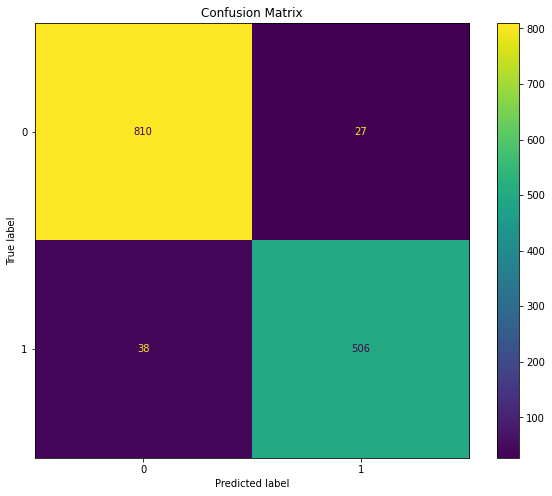

In [ ]:
# Confusion matrix

cm = metrics.confusion_matrix(y_test, predicted_y, labels=xgb_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=xgb_est.classes_)

disp.plot()
plt.title('Confusion Matrix') # fontsize = 15
plt.gcf().set_size_inches((10, 8))
plt.show()

> If the model had predicted everything perfectly, this would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero or close to zero, which this is the case in this task.

> #### Spambase dataset - raw data:




 

In [ ]:
# Define the model
import xgboost as xgb

xgb_est = xgb.XGBClassifier(objective="binary:hinge", n_jobs=1) # tree_method = 'gpu_hist')

In [ ]:
# Train the model 

xgb_est.fit(X_train_df,y_train)

print(xgb_est)

XGBClassifier(objective='binary:hinge')


In [ ]:
# predicted the output by passing X_test and also stored real target in expected_y.
predicted_y = xgb_est.predict(X_test_df) 
print(predicted_y)

[0 0 0 ... 1 1 1]


In [ ]:
# The classification report and confusion matrix of the classifier.

print(metrics.classification_report(y_test, predicted_y))


              precision    recall  f1-score   support



           0       0.99      0.97      0.98       861

           1       0.90      0.98      0.94       285



    accuracy                           0.97      1146

   macro avg       0.95      0.97      0.96      1146

weighted avg       0.97      0.97      0.97      1146




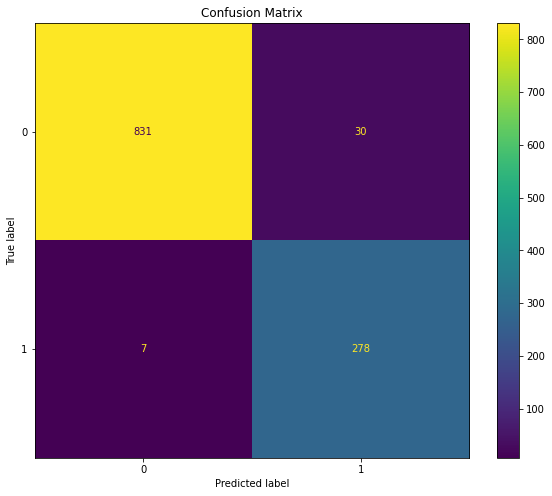

In [ ]:
# Confusion matrix

cm = metrics.confusion_matrix(y_test, predicted_y, labels=xgb_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=xgb_est.classes_)

disp.plot()
plt.title('Confusion Matrix') # fontsize = 15
plt.gcf().set_size_inches((10, 8))
plt.show()

> If the model had predicted everything perfectly, this would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero or close to zero, which this is the case in this task.

> #### Spambase dataset - raw data: LSTM model

You need to follow the additional steps in this [notebook](https://github.com/RamyaVidiyala/SpamDetectionInEmails/blob/master/SpamDetection.ipynb) in order to train the model.

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

In [ ]:
# create the model

## some config values 
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

embedding_vecor_length = 32

lstm_sp = tf.keras.Sequential()
lstm_sp.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
lstm_sp.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm_sp.add(Dense(16, activation='relu'))
lstm_sp.add(Dropout(0.1))
lstm_sp.add(Dense(1, activation='sigmoid'))
lstm_sp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_sp.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = lstm_sp.fit(X_train_df, y_train, batch_size=512, epochs=20, validation_data=(X_test_df, y_test))


In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

 > ### Hyper-tuning : XGBoost 

In [ ]:
import xgboost as xgb

# I used this due to the lack of computation power. You can use any of the previous parameters.

xgb_paramtest1 = {
                  'objective': ['binary:logistic', 'binary:hinge' ], # 'binary:logitraw', 
                  'colsample_bytree': [0.4216420662689534,  0.6548663751977097],
                  'gamma': [0.8014646438281954,  0.585644964342793],
                  'learning_rate': [0.06459168917213459, 0.011132025049516945, 0.042890776303271705],
                  'max_depth': [5, 8, 9],
                  'n_estimators': [110,120, 140, 150],
                  'subsample': [0.9659727324914016, 0.6587137821013362],
                  'tree_method': ['gpu_hist']}


print("*********** The first grid parameters: **************")
pprint(xgb_paramtest1)

*********** The first grid parameters: **************
{'colsample_bytree': [0.4216420662689534, 0.6548663751977097],
 'gamma': [0.8014646438281954, 0.585644964342793],
 'learning_rate': [0.06459168917213459,
                   0.011132025049516945,
                   0.042890776303271705],
 'max_depth': [5, 8, 9],
 'n_estimators': [110, 120, 140, 150],
 'objective': ['binary:logistic', 'binary:hinge'],
 'subsample': [0.9659727324914016, 0.6587137821013362],
 'tree_method': ['gpu_hist']}


In [ ]:
import multiprocessing

# Use the following command to set num of jobs 
n_jobs = multiprocessing.cpu_count()-1

# Define the Hyper-tuning function

#IPython.display.clear_output()

def find_hyperparams(clf, param_grid, X, y):
    # Set the parameters by cross-validation
    
    grid = GridSearchCV(clf, param_grid, verbose=3, n_jobs = None ,  return_train_score=True)
    grid.fit(X, y)
    print('Done fitting')
    return grid.best_estimator_, grid.best_params_, grid.best_score_, grid.best_index_, grid.cv_results_




In [ ]:
# Find the best combinations using the Grid search algorithm:

base_xgb = xgb.XGBClassifier() 

best_estimator_xgb, best_params_xgb, best_score_xgb, best_index_xgb, cv_results_xgb = find_hyperparams(base_xgb, xgb_paramtest1, X_train_df, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, objective=binary:logistic, subsample=0.9659727324914016, tree_method=gpu_hist;, score=(train=0.984, test=0.984) total time=   8.4s
[CV 2/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, objective=binary:logistic, subsample=0.9659727324914016, tree_method=gpu_hist;, score=(train=0.985, test=0.964) total time=   5.1s
[CV 3/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, objective=binary:logistic, subsample=0.9659727324914016, tree_method=gpu_hist;, score=(train=0.984, test=0.964) total time=   5.0s
[CV 4/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_de

In [ ]:
print("Best estimator: {0}, \n Best params: {1}, \n Best score: {2}, \n Best iteration: {3}".format(best_estimator_xgb, best_params_xgb, best_score_xgb, best_index_xgb))

Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.4216420662689534, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.8014646438281954, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.042890776303271705, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=0, num_parallel_tree=1,
              objective='binary:hinge', predictor='auto', random_state=0,
              reg_alpha=0, ...), Best params: {'colsample_bytree': 0.4216420662689534, 'gamma': 0.8014646438281954, 'learning_rate': 0.042890776303271705, 'max_depth': 9, 'n_estimators': 140, 'objective': 'binary:hinge', 'subsample': 0

In [ ]:
# Represent the search results as Dataframe

pd.DataFrame(cv_results_xgb).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_objective,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.771353,1.295529,0.008241,0.003086,0.421642,0.801465,0.064592,5,110,binary:logistic,...,0.974902,0.010166,320,0.984175,0.984720,0.983906,0.981997,0.984452,0.983850,0.000966
1,4.952644,0.093438,0.006608,0.000896,0.421642,0.801465,0.064592,5,110,binary:logistic,...,0.975557,0.009601,314,0.984720,0.985812,0.983633,0.982815,0.986088,0.984614,0.001250
2,5.658716,0.120244,0.007967,0.003251,0.421642,0.801465,0.064592,5,110,binary:hinge,...,0.978394,0.007634,257,0.991542,0.993452,0.989907,0.986088,0.990453,0.990288,0.002424
3,5.587175,0.062317,0.006671,0.000294,0.421642,0.801465,0.064592,5,110,binary:hinge,...,0.980358,0.005976,155,0.991814,0.994543,0.994544,0.988543,0.991817,0.992252,0.002220
4,5.552122,0.080060,0.008291,0.004014,0.421642,0.801465,0.064592,5,120,binary:logistic,...,0.976431,0.009037,300,0.984720,0.988540,0.985816,0.982815,0.985816,0.985541,0.001857


In [ ]:
# predicted the output by passing X_test and also stored real target in expected_y.

####### If you do not want to repeat hyper-tuning, you can use the following params:
best_params = {'colsample_bytree': 0.4216420662689534,
              'gamma': 0.8014646438281954,
              'learning_rate': 0.042890776303271705,
              'max_depth': 9, 'n_estimators': 140,
              'objective': 'binary:hinge',
              'subsample': 0.6587137821013362,
              'tree_method': 'gpu_hist'}

    
best_estimator_xgb = xgb.XGBClassifier(**best_params) 
best_estimator_xgb.fit(X_train_df, y_train)

############

xgbpred_y = best_estimator_xgb.predict(X_test_df) 
print(xgbpred_y)

[0 0 0 ... 1 0 1]


In [ ]:
# Get the params used 

print('The best xgb\' params usd: ')
best_estimator_xgb.get_params()

The best xgb' params usd: 


{'objective': 'binary:hinge',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.4216420662689534,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.8014646438281954,
 'gpu_id': 0,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.042890776303271705,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 9,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 140,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 0.6587137821013362,
 'tree_method': 'gpu_hist',
 'validate_parameters': 1,
 'verbosity': None}

In [ ]:
# The classification report and confusion matrix of the classifier.

print(metrics.classification_report(y_test, xgbpred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       0.99      0.96      0.97       285

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



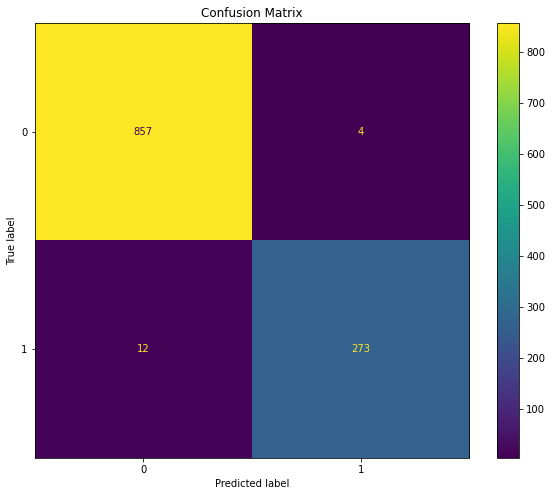

In [ ]:
# Confusion matrix

cm = metrics.confusion_matrix(y_test, xgbpred_y, labels=best_estimator_xgb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=best_estimator_xgb.classes_)

disp.plot()
plt.title('Confusion Matrix') # fontsize = 15
plt.gcf().set_size_inches((10, 8))
plt.show()

In [ ]:
# To test the model:

def classify(user_input):
    custom_train = [('text', [user_input])]
    custom_train = pd.DataFrame.from_dict(custom_train)
    text = custom_train.iloc[:, 0].values
    return best_estimator_xgb.predict(vect_count.transform(text))

text = input('Type here something and see if it belongs to spam:\n ')
if classify(text):
    print(classify(text))
    print('spam')
else:
    print('ham')
    print(classify(text))
    
    

# Target col = 1 ====> Spam 
# Target col = 0 ====> Ham 

Type here something and see if it belongs to spam:
  IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.


ham
[0]


In [ ]:
# another test

text = input('Type here something and see if it belongs to spam: ')
if classify(text):
    print(classify(text))
    print('spam')
else:
    print('ham')
    print(classify(text))


Type here something and see if it belongs to spam:  Hey there! I hope you're free tonight, let's catch up at dinner!


ham
[0]


In [ ]:
# another test

text = input('Type here something and see if it belongs to spam: ')
if classify(text):
    print(classify(text))
    print('spam')
else:
    print('ham')
    print(classify(text))


Type here something and see if it belongs to spam:  "Google’s Jigsaw unit published a quiz that tests users’ abilities to identify phishing emails. The quiz tests you on a series of emails to see if you can distinguish telltale signs of phishing."


ham
[0]


In [ ]:
import pickle 


filename = "xgb_best.sav"

# Save the trained model as a pickle string.
pickle.dump(best_estimator_xgb,open(filename, "wb") )
  

## Load the pickled model
xgb_from_pickle = pickle.load(open(filename, "rb"))
  
# Use the loaded pickled model to make predictions
xgb_from_pickle.predict(X_test_df)

array([0, 0, 0, ..., 1, 0, 1])

 > # Additional functions to train & plot the model

In [ ]:
scores = []
roc_auc = []

iterations = 50

for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RandomState())

    # For now, let's train only on word frequency vectors
    X_train = X_train[:, 0:48]
    X_test = X_test[:, 0:48]

    clf = RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=73)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc.append(auc(fpr, tpr))

> ### Test and plot the model

In [ ]:
def show_auc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    

In [ ]:
show_auc(y_test, clf.predict_proba(X_test)[:, 1])

In [ ]:
print('Accuracy. Avg: %0.5f, Std: %0.5f' % (np.mean(scores), np.std(scores)))
print('AUC. Avg: %0.5f, Std: %0.5f' % (np.mean(roc_auc), np.std(roc_auc)))